Saving clothes_price_prediction_dat.csv to clothes_price_prediction_dat (9).csv
Información inicial del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None

Estadísticas básicas del dataset:
             Price
count  1000.000000
mean    106.289000
std      53.695444
min      10.000000
25%      59.750000
50%     108.000000
75%     150.000000
max     199.000000

Valores nulos por columna:
Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

Cantidad de filas antes y después de eliminar duplicados: 1000 -> 1000


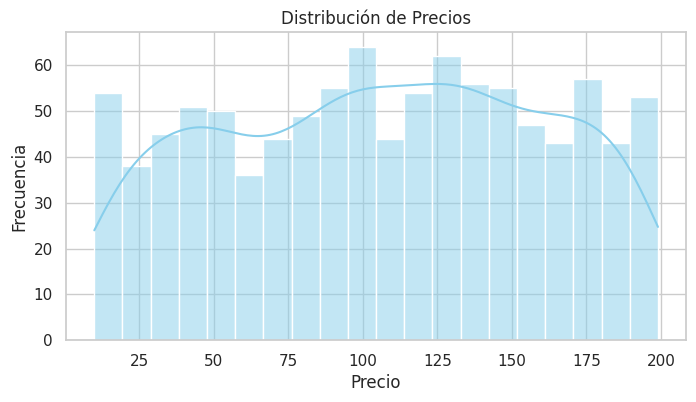

El gráfico muestra una distribución de precios, donde la mayoría de los productos se concentran entre precios bajos y medios. Existen pocos productos con precios altos, lo cual indica una distribución sesgada hacia precios económicos.


<ipython-input-10-b66a219e22b1>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x="Category", y="Price", estimator=sum, palette="viridis")


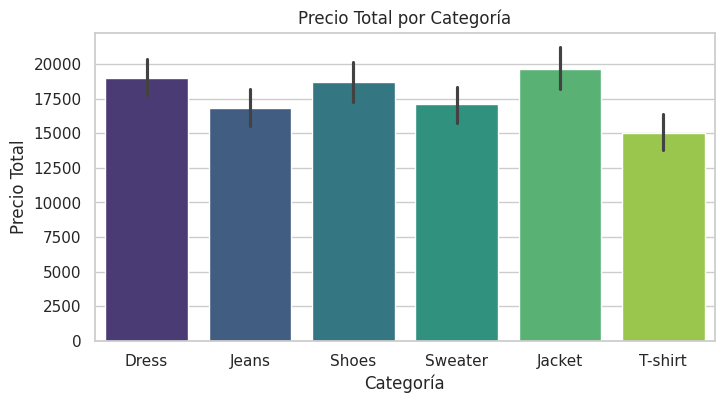

Este gráfico permite identificar las categorías con mayor valor total en precios. Las categorías con barras más altas son las que contienen productos más costosos o en mayor cantidad dentro del catálogo.


<ipython-input-10-b66a219e22b1>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="Material", y="Price", palette="coolwarm")


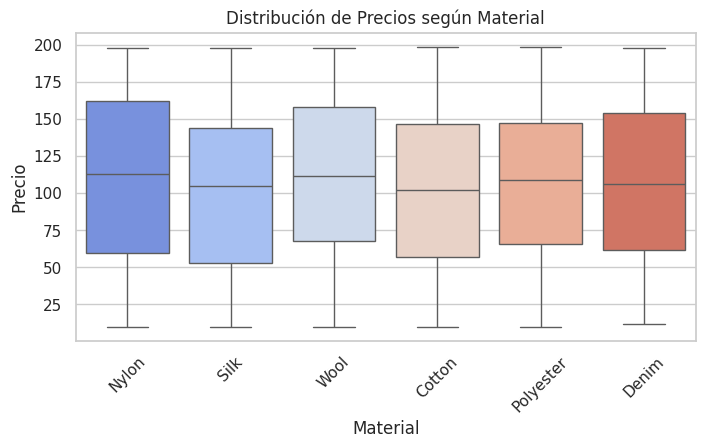

Este gráfico de caja y bigotes muestra la variabilidad de precios según el material. Los materiales como 'Silk' y 'Wool' presentan precios más altos y una mayor dispersión, mientras que materiales como 'Nylon' y 'Cotton' se concentran en precios más bajos.


In [10]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del entorno para gráficos
sns.set(style="whitegrid")

# Cargar el dataset (asegúrate de subir tu archivo a Google Colab)
from google.colab import files
uploaded = files.upload()

# Leer el archivo, omitiendo la primera línea y manejando el delimitador ;;;
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, skiprows=1, sep=';;;', engine='python')

# Eliminar columnas vacías generadas por el delimitador
df = df.dropna(how='all', axis=1)

# Dividir la única columna en múltiples columnas separadas por comas
df = df[df.columns[0]].str.split(',', expand=True)

# Asignar nombres a las columnas según el encabezado del archivo
df.columns = ["Brand", "Category", "Color", "Size", "Material", "Price"]

# Convertir la columna Price a tipo numérico
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Mostrar información inicial del dataset
print("Información inicial del dataset:")
print(df.info())

# Mostrar estadística básica
print("\nEstadísticas básicas del dataset:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar duplicados
initial_row_count = df.shape[0]
df_cleaned = df.drop_duplicates()
cleaned_row_count = df_cleaned.shape[0]

print(f"\nCantidad de filas antes y después de eliminar duplicados: {initial_row_count} -> {cleaned_row_count}")

# Gráfico 1: Distribución de precios
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned["Price"], bins=20, kde=True, color="skyblue")
plt.title("Distribución de Precios")
plt.xlabel("Precio")  # Eje X muestra los rangos de precios
plt.ylabel("Frecuencia")  # Eje Y muestra la cantidad de productos en cada rango de precios
plt.show()
print("El gráfico muestra una distribución de precios, donde la mayoría de los productos se concentran entre precios bajos y medios. Existen pocos productos con precios altos, lo cual indica una distribución sesgada hacia precios económicos.")

# Gráfico 2: Precio total por categoría
plt.figure(figsize=(8, 4))
sns.barplot(data=df_cleaned, x="Category", y="Price", estimator=sum, palette="viridis")
plt.title("Precio Total por Categoría")
plt.xlabel("Categoría")  # Eje X muestra las distintas categorías de productos
plt.ylabel("Precio Total")  # Eje Y muestra la suma total de los precios por categoría
plt.show()
print("Este gráfico permite identificar las categorías con mayor valor total en precios. Las categorías con barras más altas son las que contienen productos más costosos o en mayor cantidad dentro del catálogo.")

# Gráfico 3: Distribución de precios según el material
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_cleaned, x="Material", y="Price", palette="coolwarm")
plt.title("Distribución de Precios según Material")
plt.xlabel("Material")  # Eje X muestra los distintos materiales de los productos
plt.ylabel("Precio")  # Eje Y muestra los precios asociados a cada material
plt.xticks(rotation=45)
plt.show()
print("Este gráfico de caja y bigotes muestra la variabilidad de precios según el material. Los materiales como 'Silk' y 'Wool' presentan precios más altos y una mayor dispersión, mientras que materiales como 'Nylon' y 'Cotton' se concentran en precios más bajos.")
